In [1]:
%matplotlib inline

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

from scipy.stats import skew, kurtosis

# Books Dataset

### Read and clean data

In [3]:
books_rates = pd.read_csv('data/Books_Data_Clean.csv')

In [4]:
books_rates.head()

,index,Publishing Year,Book Name,Author,language_code,Author_Rating,Book_average_rating,Book_ratings_count,genre,gross sales,publisher revenue,sale price,sales rank,Publisher,units sold
0,0,1975.0,Beowulf,"Unknown, Seamus Heaney",en-US,Novice,3.42,155903,genre fiction,34160.0,20496.0,4.88,1,HarperCollins Publishers,7000
1,1,1987.0,Batman: Year One,"Frank Miller, David Mazzucchelli, Richmond Lew...",eng,Intermediate,4.23,145267,genre fiction,12437.5,7462.5,1.99,2,HarperCollins Publishers,6250
2,2,2015.0,Go Set a Watchman,Harper Lee,eng,Novice,3.31,138669,genre fiction,47795.0,28677.0,8.69,3,"Amazon Digital Services, Inc.",5500
3,3,2008.0,When You Are Engulfed in Flames,David Sedaris,en-US,Intermediate,4.04,150898,fiction,41250.0,24750.0,7.50,3,Hachette Book Group,5500
4,4,2011.0,Daughter of Smoke & Bone,Laini Taylor,eng,Intermediate,4.04,198283,genre fiction,37952.5,22771.5,7.99,4,Penguin Group (USA) LLC,4750


In [5]:
# Rename columns
books_rates.columns = books_rates.columns.str.strip().str.lower().str.replace(' ', '_')

In [6]:
books_rates.columns

Index(['index', 'publishing_year', 'book_name', 'author', 'language_code',
       'author_rating', 'book_average_rating', 'book_ratings_count', 'genre',
       'gross_sales', 'publisher_revenue', 'sale_price', 'sales_rank',
       'publisher', 'units_sold'],
      dtype='object')

In [7]:
# Convert publisher_year from float to int
books_rates['publishing_year'] = books_rates['publishing_year'].astype('Int64', errors='ignore')


In [8]:
books_rates.publishing_year

0       1975
1       1987
2       2015
3       2008
4       2011
        ... 
1065    2014
1066    1989
1067    1930
1068    2011
1069    1999
Name: publishing_year, Length: 1070, dtype: Int64

In [9]:
books_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                1070 non-null   int64  
 1   publishing_year      1069 non-null   Int64  
 2   book_name            1047 non-null   object 
 3   author               1070 non-null   object 
 4   language_code        1017 non-null   object 
 5   author_rating        1070 non-null   object 
 6   book_average_rating  1070 non-null   float64
 7   book_ratings_count   1070 non-null   int64  
 8   genre                1070 non-null   object 
 9   gross_sales          1070 non-null   float64
 10  publisher_revenue    1070 non-null   float64
 11  sale_price           1070 non-null   float64
 12  sales_rank           1070 non-null   int64  
 13  publisher            1070 non-null   object 
 14  units_sold           1070 non-null   int64  
dtypes: Int64(1), float64(4), int64(4), obj

In [10]:
books_rates.describe().T

,count,mean,std,min,25%,50%,75%,max
index,1070.0,534.500000,309.026698,0.00,267.250,534.500,801.7500,1069.00
publishing_year,1069.0,1971.377923,185.080257,-560.00,1985.000,2003.000,2010.0000,2016.00
book_average_rating,1070.0,4.007000,0.247244,2.97,3.850,4.015,4.1700,4.77
book_ratings_count,1070.0,94909.913084,31513.242518,27308.00,70398.000,89309.000,113906.5000,206792.00
gross_sales,1070.0,1856.622944,3936.924240,104.94,372.465,809.745,1487.9575,47795.00
publisher_revenue,1070.0,843.281030,2257.596743,0.00,0.000,273.078,721.1805,28677.00
sale_price,1070.0,4.869561,3.559919,0.99,1.990,3.990,6.9900,33.86
sales_rank,1070.0,611.652336,369.849830,1.00,287.500,595.500,932.5000,1273.00
units_sold,1070.0,9676.980374,15370.571306,106.00,551.250,3924.000,5312.2500,61560.00


In [11]:
books_rates.shape

(1070, 15)

In [12]:
books_rates.isnull().sum()

index                   0
publishing_year         1
book_name              23
author                  0
language_code          53
author_rating           0
book_average_rating     0
book_ratings_count      0
genre                   0
gross_sales             0
publisher_revenue       0
sale_price              0
sales_rank              0
publisher               0
units_sold              0
dtype: int64

In [13]:
# Check how many rows will be lost if we delete NaN values – 78 or approximately 7.3%.
books_rates[books_rates.book_name.isnull() | books_rates.publishing_year.isnull() | books_rates.language_code.isnull()]

,index,publishing_year,book_name,author,language_code,author_rating,book_average_rating,book_ratings_count,genre,gross_sales,publisher_revenue,sale_price,sales_rank,publisher,units_sold
22,22,1991,Needful Things,Stephen King,NaN,Intermediate,3.87,153821,genre fiction,2772.00,0.000,0.99,23,"Amazon Digital Services, Inc.",2800
24,24,1996,NaN,"Kenneth Branagh, William Shakespeare",eng,Intermediate,4.12,156869,genre fiction,2639.34,1583.604,0.99,25,"Amazon Digital Services, Inc.",2666
34,34,2007,NaN,Brandon Sanderson,eng,Intermediate,4.35,150736,genre fiction,17980.00,10788.000,8.99,35,Random House LLC,2000
74,74,2007,"Are You There, Vodka? It's Me, Chelsea",Chelsea Handler,NaN,Intermediate,3.85,127096,genre fiction,5462.31,3277.386,3.99,76,Hachette Book Group,1369
105,105,2011,NaN,Mark Cotta Vaz,eng,Intermediate,4.30,188136,genre fiction,7670.40,4602.240,7.99,108,Penguin Group (USA) LLC,960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1031,1031,2015,NaN,Colleen Hoover,en-GB,Excellent,4.25,72611,nonfiction,1175.93,705.558,10.99,1218,"Amazon Digital Services, Inc.",107
1032,1032,2012,Pines,Blake Crouch,NaN,Intermediate,3.88,34789,genre fiction,105.93,0.000,0.99,1218,"Amazon Digital Services, Inc.",107
1033,1033,1994,Disclosure,Michael Crichton,NaN,Intermediate,3.76,57818,genre fiction,854.93,512.958,7.99,1219,Random House LLC,107
1059,1059,1955,Beezus and Ramona,Beverly Cleary,NaN,Intermediate,3.97,75987,genre fiction,740.94,444.564,6.99,1257,Random House LLC,106


In [14]:
books_rates = books_rates.dropna()

In [15]:
books_rates.shape

(998, 15)

In [16]:
cat_columns = books_rates.select_dtypes(include='object')

for col in cat_columns:
    if col != 'book_name':
        print('\n',col.upper(), '****')
        print(books_rates[col].value_counts())


 AUTHOR ****
Stephen King                 27
Nicholas Sparks              10
Jim Butcher                  10
Charlaine Harris             10
Jodi Picoult                  9
                             ..
Michael Connelly              1
Ayn Rand                      1
Judi Barrett, Ron Barrett     1
Helen Simonson                1
Dashiell Hammett              1
Name: author, Length: 698, dtype: int64

 LANGUAGE_CODE ****
eng      725
en-US    228
en-GB     29
en-CA      7
fre        4
spa        2
ara        2
nl         1
Name: language_code, dtype: int64

 AUTHOR_RATING ****
Intermediate    589
Excellent       333
Famous           47
Novice           29
Name: author_rating, dtype: int64

 GENRE ****
genre fiction    772
nonfiction       156
fiction           55
children          15
Name: genre, dtype: int64

 PUBLISHER ****
Amazon Digital Services,  Inc.          566
Random House LLC                        111
Penguin Group (USA) LLC                  97
HarperCollins Publishers    

### Exploration of the data

In [20]:
#Best-selling author
total_sales_per_author  = books_rates.groupby('author')['gross_sales'].sum()

top_authors = total_sales_per_author.sort_values(ascending=False).head(10)

print('Top ten authors by sales')
top_authors

Top ten authors by sales


author
Harper Lee                47795.00
David Sedaris             42323.41
Charlaine Harris          39453.08
Stephen King              39203.89
Laini Taylor              38278.41
Unknown, Seamus Heaney    34160.00
Sarah Dessen              31034.85
Colleen Hoover            29706.14
C.S. Lewis                28972.57
Jeffrey Eugenides         27984.38
Name: gross_sales, dtype: float64

In [21]:
#Best-selling books
best_selling_books = books_rates.groupby('book_name')['gross_sales'].sum().sort_values()
authors = []
for title in best_selling_books.index:
    authors.append(books_rates.loc[books_rates['book_name'] == title, 'author'].iloc[0])

result_df = pd.merge(best_selling_books, books_rates[['book_name', 'author']], on='book_name', how='left')
print('Top ten selling books')
result_df.head(10)

Top ten selling books


,book_name,gross_sales,author
0,Night Road,104.94,Kristin Hannah
1,Gray Mountain,104.94,John Grisham
2,Airframe,104.94,Michael Crichton
3,Intensity,104.94,Dean Koontz
4,The Carnivorous Carnival,105.93,"Lemony Snicket, Brett Helquist"
5,The Killer Angels,105.93,Michael Shaara
6,A Painted House,105.93,John Grisham
7,á¼ˆÎ½Ï„Î¹Î³ÏŒÎ½Î·,106.92,"Sophocles, J.E. Thomas"
8,Blood of the Fold,106.92,Terry Goodkind
9,Masquerade,106.92,Melissa de la Cruz


In [22]:
average_rating_by_book_name  = books_rates.groupby('book_name')['book_average_rating'].value_counts().sort_values(ascending= False).head(10)
print('Top ten books by average rating')
average_rating_by_book_name

Top ten books by average rating


book_name                             book_average_rating
 A Monster Calls                      4.36                   1
The Electric Kool-Aid Acid Test       3.92                   1
The Constant Princess                 3.88                   1
The Corrections                       3.78                   1
The DUFF: Designated Ugly Fat Friend  3.86                   1
The Dark Half                         3.74                   1
The Dark Tower                        4.27                   1
The Darkest Minds                     4.26                   1
The Day of the Jackal                 4.25                   1
The Dead Zone                         3.90                   1
Name: book_average_rating, dtype: int64

In [35]:
# average_ratings = books_rates.groupby('book_name')['book_average_rating'].value_counts().sort_values(ascending=False)
average_ratings = books_rates.groupby('book_name')['book_average_rating'].agg(['count', 'mean']).sort_values(by='count', ascending=False)
authors = []
for title in average_ratings.index:
    authors.append(books_rates.loc[books_rates['book_name'] == title, 'author'])

result_df = pd.merge(average_ratings, books_rates[['book_name', 'book_average_rating','author']], on='book_name', how='left', suffixes=('_average', '_original'))
result_df = result_df[['book_name', 'book_average_rating', 'author']]
result_df = result_df.sort_values(by='book_average_rating', ascending=False)
print('Top ten selling books')
result_df.head(10)

Top ten selling books


,book_name,book_average_rating,author
347,Words of Radiance,4.77,Brandon Sanderson
668,A Court of Mist and Fury,4.72,Sarah J. Maas
20,The Essential Calvin and Hobbes: A Calvin and ...,4.65,Bill Watterson
467,The Way of Kings,4.64,Brandon Sanderson
688,Calvin and Hobbes,4.61,"Bill Watterson, G.B. Trudeau"
499,Queen of Shadows,4.60,Sarah J. Maas
112,The Hobbit and The Lord of the Rings,4.59,J.R.R. Tolkien
628,A Storm of Swords: Part 2 Blood and Gold,4.56,George R.R. Martin
117,The House of Hades,4.54,Rick Riordan
898,Heir of Fire,4.53,Sarah J. Maas


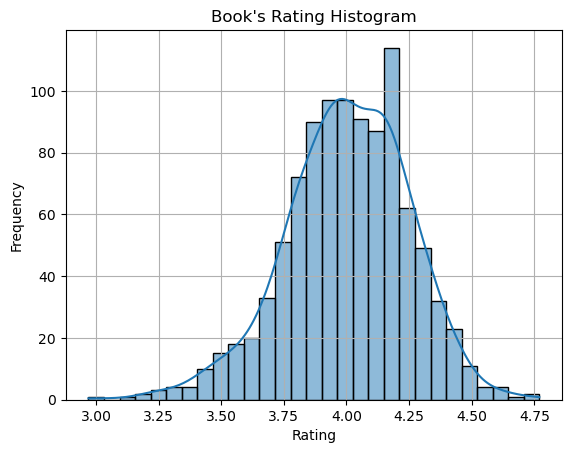

In [43]:
plt.title("Book's Rating Histogram")
plt.grid(True)
sns.histplot(books_rates['book_average_rating'], kde=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [61]:
print('Skewness:',skew(books_rates['book_average_rating']),'\n',
      'Mean rating:',books_rates['book_average_rating'].mean(),'\n', 
      'Kurtosis:', kurtosis(books_rates['book_average_rating']))
print('Most of the books receive slightly above the average rating.')

Skewness: -0.3818552646460938 
 Mean rating: 4.003056112224446 
 Kurtosis: 0.5372955126974732
Most of the books receive slightly below the average rating.


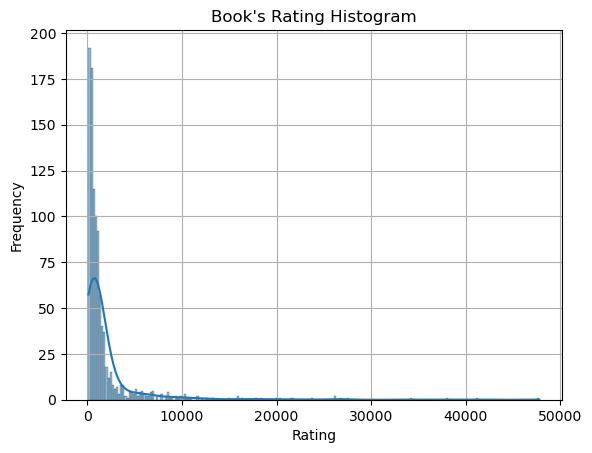

In [67]:
plt.title("Histogram of authors' sales.")
plt.grid(True)
sns.histplot(books_rates['gross_sales'], kde=True)
plt.xlabel('Total sales')
plt.ylabel('Frequency')
plt.show()

In [69]:
print('Skewness:',skew(books_rates['gross_sales']),'\n',
      'Mean sales:',books_rates['gross_sales'].mean(),'\n', 
      'Kurtosis:', kurtosis(books_rates['gross_sales']))
print('Most authors have achieved sales below 2000.')

Skewness: 5.862824974902485 
 Mean sales: 1885.0851503006031 
 Kurtosis: 44.64326806018543
Most authors have achieved sales below 2000.


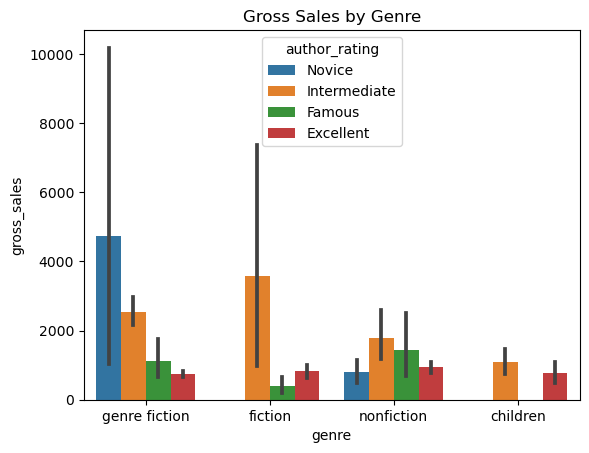

Fiction Books from Novice Authors have the highest gross sales compared to others


In [66]:
plt.title('Gross Sales by Genre')
sns.barplot(data=books_rates, x='genre', y='gross_sales', hue='author_rating')
plt.show()
print("Fiction Books from Novice Authors have the highest gross sales compared to others")

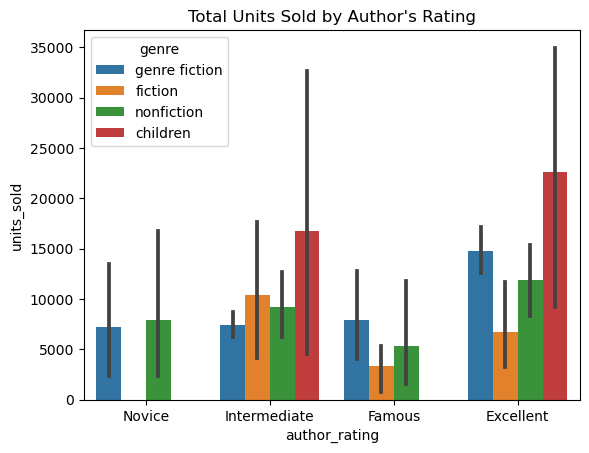

'Excellent' Author tends to sold more books
and Children Books also tends to sold more.


In [55]:
plt.title("Total Units Sold by Author's Rating")
sns.barplot(data=books_rates, x='author_rating', y='units_sold', hue='genre')
plt.show()
print("'Excellent' Author tends to sold more books")
print("and Children Books also tends to sold more.")

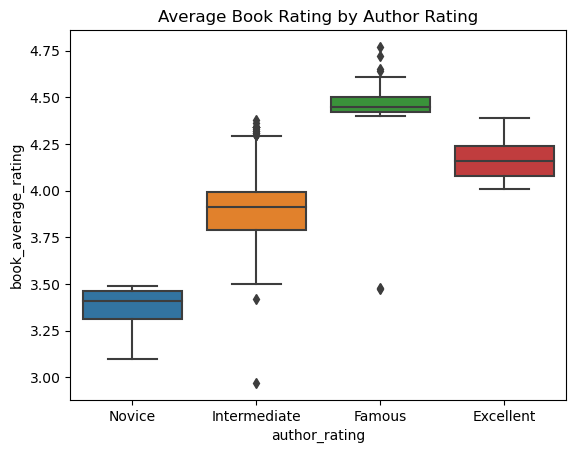

Famous Authors have the most average rating, and Novice Authors are lowest one


In [71]:
plt.title('Average Book Rating by Author Rating')
sns.boxplot(data=books_rates, x = 'author_rating', y = 'book_average_rating')
plt.show()
print("Famous Authors have the most average rating, and Novice Authors are lowest one")

In [72]:
books_rates.columns

Index(['index', 'publishing_year', 'book_name', 'author', 'language_code',
       'author_rating', 'book_average_rating', 'book_ratings_count', 'genre',
       'gross_sales', 'publisher_revenue', 'sale_price', 'sales_rank',
       'publisher', 'units_sold'],
      dtype='object')

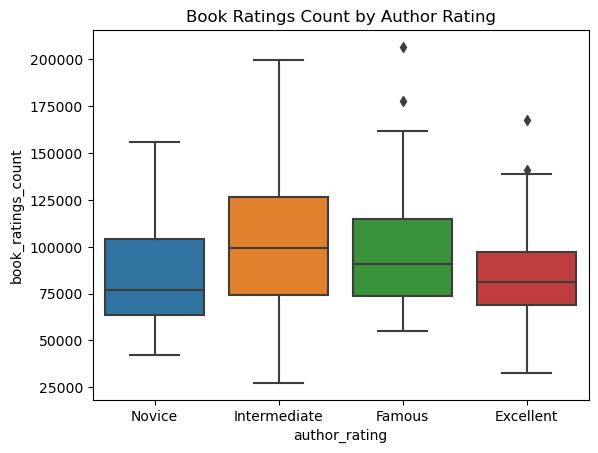

Books from Intermediate Authors are rated more


In [75]:
plt.title("Book Ratings Count by Author Rating")
sns.boxplot(data=books_rates, x='author_rating', y='book_ratings_count')
plt.show()
print("Books from Intermediate Authors are rated more")